# HW5 - Regex, Python, Classifiers

There are three problems in this assignment.

1. Text file processing with Python and regex
1. Basic EDA with pandas and matplotlib
1. Building classifier models with R and/or Python

The first two problems use data on YouTube statistics related to top trending videos. The third uses different data.


### Deliverables

* For Problem 1 you'll end up with one Python script file (.py). If you insist, you could write your function in this notebook but I recommend using PyCharm. You'll also end up with an output csv file that you'll turn in.
* This notebook containing your work for the Problems 2. Make sure that you've run all of your cells but that you've also organized your files so that if I have to rerun something, it will all work.
* Whatever files you create for Problem 3.

Please organize your deliverables within a folder in some coherent way. Include a README.md file to tell me where to find your work and how to test it (mostly for Problem 3).

## Problem 1 - Text file processing with Python

See https://www.kaggle.com/datasnaek/youtube-new for a description of this dataset. I've
provided the file `USvideos.csv` in the `data` folder.

Now you are going to write a short Python script to read the
`USvideos.csv` file and do some basic text file manipulation.

I'm giving you some skeleton code that you are free to use if you wish. The
skeleton code file is called `process_youtube_stats_skeleton.py`. **I highly
encourage you to use it as it lays out the steps needed and has many useful
code snippets and comments.**

You should also review the process_apache_log.py file that
we first saw in the Downloads for the regex session - I've included that as well. You can use
these files as a starting point for ideas or even just edit and add/delete code
as needed to accomplish this last task. Your new Python file should be named:

    process_youtube_stats_yourname.py # Obviously replacing "yourname" appropriately

Your job is to modify the skeleton file (or create a new program
from scratch) to accomplish the following. 

### The big picture
The big picture is that you are going to read the file,
use regex to find lines having a certain category_id value and some values on 
that line, update some counters, and write out the lines of interest to a new file.

I highly recommend you check out the Kaggle site for this dataset and snoop the data
yourself with a text editor.

**You must use regex for any text pattern matching.**

### The more detailed picture

Here are the detailed requirements:

* Your function `def` should look like the following (see the skeleton code):

      `def process_youtube(fn_youtube , fn_out):`

Your function will take an input filename and an output filename as arguments.

* You need to loop over the lines in the input file and use regex to determine if each
line has a value of 28 for the category_id field. Yes, you can hard code the 
28 into your regex pattern. Category_id 28 is Science & Technology.

For those lines that ARE from category 28:

* Increment a counter representing the number of lines matched.
* Using the captured trending_date as a dictionary key, update the dictionary
of counts by trending_date
* Store the line in a master list so that we can write out these lines at the end.

For those lines that ARE NOT from category 28:

* Increment a counter representing the number of lines NOT matched.

After all lines processed,
write out a message with the totals. Here's the last few lines of my output.

    18.01.01:	   10 videos
    18.26.02:	    9 videos
    18.05.02:	   14 videos
    18.08.01:	   11 videos
    17.22.12:	    8 videos

    Num lines matched --> 1233
    Num lines not matched --> 26089
 
    
Remember that dictionaries are not sorted and so you're output of the counts by date
may differ in the order printed out from mine.

Finally, write out the matched lines that you stored in a list.
There are several ways to write out a list of strings to a file. Google and
StackOverflow are your friend.

Again, see the skeleton code.


**HACKER EXTRA:** 

To make this program even better, change the function so that you can pass in
any category_id to use as the filter instead of having 28 hard coded in as it is now.

## Problem 2 - EDA with pandas and plotting libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re
import csv
import seaborn as sns
sns.set()

### Step 1 - Read in the data
Looks like there are two datetime related fields. Let's see if pandas can parse them
correctly.

In [ ]:
# Read the data
USvideos = pd.read_csv('data/USvideos_no_desc.csv', parse_dates=['trending_date', 'publish_time'])

In [ ]:
# Check out the structure of the resulting DataFrame
USvideos.describe()

**Question 2.1** Which of the date fields gets read in correctly as some sort of date or datetime field?


In [ ]:
#The 'publish_time' field has been read in correctly

**Question 2.2** List the first 10 rows, rows 1500 through 1510, and the last 10 rows of the data frame. Use three separate code cells.

In [ ]:
USvideos.head(10)

In [ ]:
USvideos[1500:1511]

In [ ]:
USvideos.tail(10)

### Step 2 - Data cleaning and prep


**Question 2.3**

Convert the `trending_date` field to an actual datetime data type using the `to_datetime()` function. Show that it worked with the `.info()` method for data frames. Then compute the difference between `publish_time` and `trending_date` in hours. Store it in a new field called `time_to_trend`.

In [ ]:
USvideos['time_to_trend']= pd.to_datetime(USvideos['trending_date'], format = '%y.%d.%m')

In [ ]:
USvideos.info('time_to_trend')

**Question 2.4**

Create new field called the `like_ratio` that is the number of likes divided by the sum of the number of likes and dislikes. Then use then use the `describe()` method to get a quick statistical summary of this new field. Then create two more new fields:

* `comment_intensity` as the ratio of comment_count and views
* `thumbs` as the sum of likes and dislikes

In [ ]:
USvideos['like_ratio'] = USvideos['likes']/(USvideos['likes']+USvideos['dislikes'])
USvideos['like_ratio'].describe()


In [ ]:
USvideos['comment_intensity'] = (USvideos['comment_count']/USvideos['views'])
USvideos['comment_intensity'].describe()

In [ ]:
USvideos['thumbs'] = USvideos['likes'] + USvideos['dislikes']
USvideos['thumbs'].describe()

### Step 3 - Exploratory analysis with pandas

Note: Ignore the fact that some videos appear more than once because they trended multiple times on different dates.

**Question 2.5**

How many videos by channel title? Even better, sort in descending order. Here's what I get for the first few results:

    channel_title
    ESPN                                      114
    Vox                                       113
    Netflix                                   112
    NBA                                       112
    First We Feast                            111
    The Tonight Show Starring Jimmy Fallon    109



In [ ]:
grouped = USvideos.groupby('channel_title')
a = grouped.agg({'channel_title':'count'})
a.sort_index(by=['channel_title'], ascending = [False])



**Question 2.6**

Which channels are in the top 10 and bottom 10 for the mean of the `like_ratio` field we created above. Only consider channels with at least 5 videos in the USvideos DataFrame.

Obviously you will end up with several Python statements. 

In [ ]:
likes = USvideos.groupby('channel_title').agg({'like_ratio': [np.size, np.mean]})
Grtr_5 = likes['like_ratio']['size'] >= 5
Top_10 = likes[Grtr_5].sort_values([('like_ratio', 'mean')], ascending=False)[:10]
Bottom_10 = likes[Grtr_5].sort_values([('like_ratio', 'mean')], ascending=True)[0:10]


In [ ]:
Top_10

In [ ]:
Bottom_10

**Question 2.7**

You'll notice that `category_id` is an integer. Not very informative. Thankfully, the Kaggle site included json files which map category id to a category name. Well, kind of. If you look at the json file in the data folder, you'll see that it's got some other stuff in there. However, if you explore some of the kernels in Kaggle, you might run across the following bit of code which creates a simple dictionary with the `category_id` as the key and a category name as the value. Here's the code. Your job is to figure out how it works and put a comment before each line explaining what it does.

In [ ]:
# creates a dictionary that maps `category_id` to `category`

# import json library
import json
#here create new dictionary, no parameters yet
id_to_category = {}
#open the file using with statement
with open('./data/US_category_id.json', 'r') as f:
    #load the json data
    data = json.load(f)
    #for category in list 'items'
    for category in data['items']:
        #dictionary key 'id' is mapped to values 'snippet' and category title
        id_to_category[category['id']] = category['snippet']['title']
#print dictionary
print(id_to_category)

**Question 2.8**
Now figure out how you can use the `id_to_category` dictionary to create a new field in `USvideos` DataFrame called `category_name` containing, of course, the category name. 

In [ ]:
new_cat = pd.DataFrame()
new_cat['category_id'] = id_to_category.keys()
new_cat['category_name'] = id_to_category.values()
new_cat['category_id'] =pd.to_numeric(new_cat['category_id'])
USvideos = pd.merge(USvideos, new_cat)
USvideos.info()


**Question 2.9**
Then, use the `describe()` method along with `group_by` (and maybe `unstack()`) to compute summary statistics of the `views` field, grouping by `category_name`.

In [ ]:
USvideos.describe()

### Step 4 - Basic plotting in Python

Feel free to use either matplotlib, pandas or Seaborn (or any combination of) to create the following basic plots.

In [ ]:
# Create a histogram of number of views
_ = plt.hist(USvideos['views'])
plt.show()

In [ ]:
# Create a histogram of the log of number of views
a = np.log(USvideos['views'])
_ = plt.hist(a)
plt.show()

In [ ]:
# Create a scatter plot of likes vs views
plt.scatter(USvideos['likes'], USvideos['views'])
plt.show()

In [ ]:
# Create a set of boxplots of like_ratio by category
sns.boxplot(x='category_name', y='like_ratio', data=USvideos)
plt.show()

In [ ]:
# HACKER EXTRA - experiment with additional plots that help us understand this dataset
sns.distplot(USvideos['likes'])
sns.distplot(USvideos['dislikes']);
plt.show()

In [ ]:
sns.kdeplot(USvideos['views']);
plt.show()

/home/mis4470/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


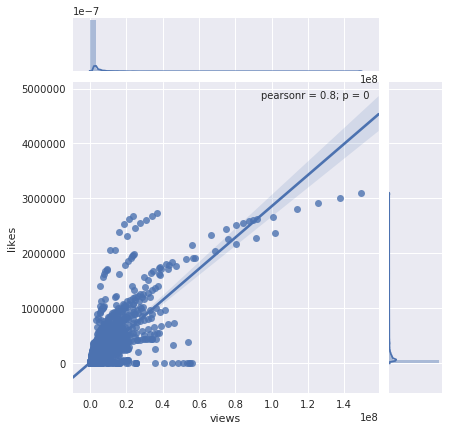

In [110]:
sns.jointplot("views", "likes", data=USvideos, kind='reg');
plt.show()

/home/mis4470/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


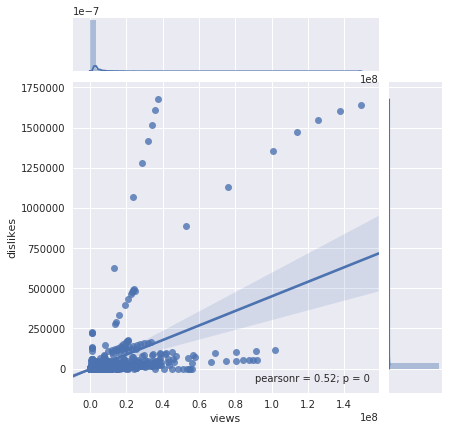

In [109]:
sns.jointplot("views", "dislikes", data=USvideos, kind='reg');
plt.show()

/home/mis4470/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


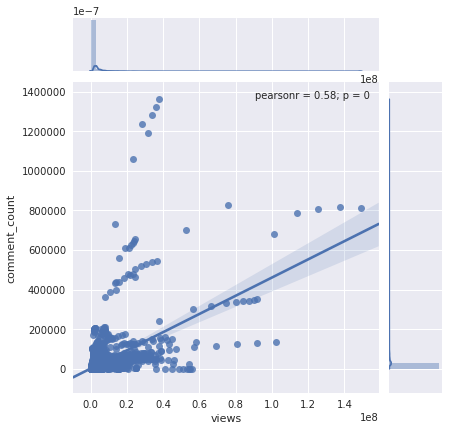

In [111]:
sns.jointplot("views", "comment_count", data=USvideos, kind='reg');
plt.show()

## Problem 3 - Classification

Coming soon... still tidying up some details on the problem.

